In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import cv2
import PIL.Image as Image
import os
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#Reading the data
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar= True)
data_dir

228813984/228813984 [==============================] - 22s 0us/step


'.\\datasets\\flower_photos'

In [3]:
#Converting the data directory from a string path into a windows path
data_dir= pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [5]:
sunflowers= list(data_dir.glob('sunflowers/*'))
sunflowers[1]

WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg')

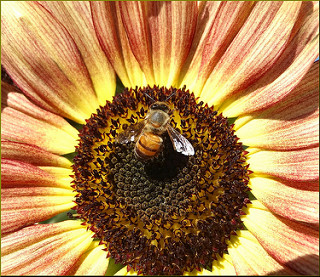

In [6]:
Image.open(str(sunflowers[5]))

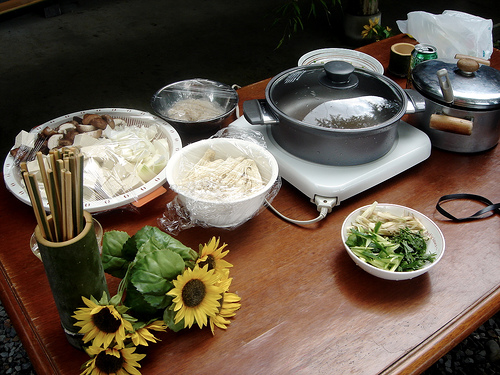

In [7]:
Image.open(str(sunflowers[25]))

In [8]:
flower_images= {
    'roses': list(data_dir.glob('roses/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'daisy': list(data_dir.glob('daisy/*'))
}

In [9]:
flower_labels= {
    'roses': 0,
    'tulips': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'daisy': 4
}

In [10]:
X, y= [], []

for flowers, images in flower_images.items():
  for image in images:
    img= cv2.imread(str(image))
    resized_image= cv2.resize(img, (224, 224))
    X.append(resized_image)
    y.append(flower_labels[flowers])

In [11]:
X= np.array(X)
y= np.array(y)

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [13]:
X_train.shape

(2752, 224, 224, 3)

In [14]:
X_train_scaled= X_train / 255
X_test_scaled= X_test/ 255

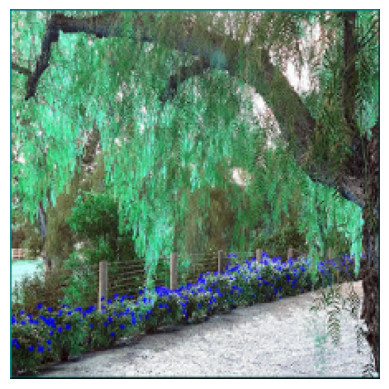

In [15]:
plt.axis('off')
plt.imshow(X[5])

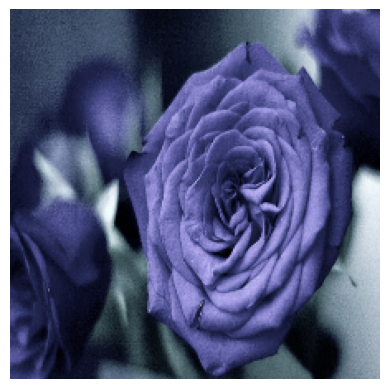

In [16]:
plt.axis('off')
plt.imshow(X[12])

In [17]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.8)
])

In [18]:
data_augmentation2= keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9)
])

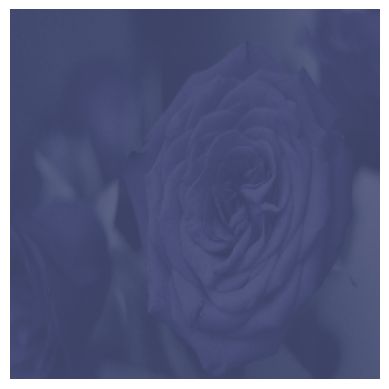

In [19]:
plt.axis('off')
plt.imshow(data_augmentation2(X)[12].numpy().astype('uint8'))

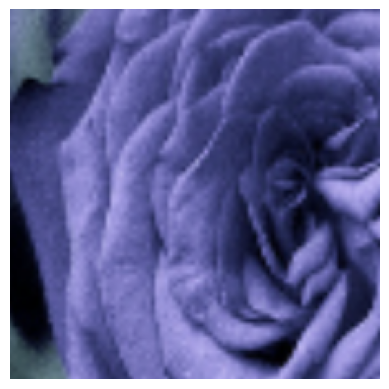

In [20]:
plt.axis('off')
plt.imshow(data_augmentation(X)[12].numpy().astype('uint8'))

In [21]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.5)
])

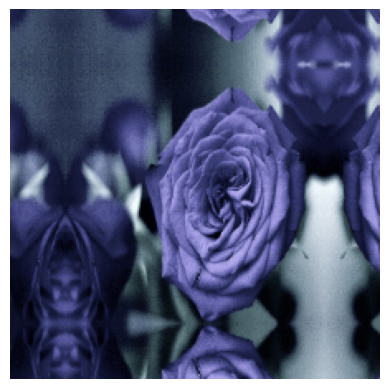

In [22]:
plt.axis('off')
plt.imshow(data_augmentation(X)[12].numpy().astype('uint8'))

In [23]:
feature_extraction_model= "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model= hub.KerasLayer(
    feature_extraction_model, input_shape=(224,224,3), trainable=False
)

In [24]:
num_of_flowers=5
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_flowers)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics= ["acc"]
)
model.fit(X_train_scaled, y_train, epochs=5)